In [1]:
#import neuron
from neuron import h, gui
from neuron.units import ms, mV
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams["svg.fonttype"] = "none"


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\mizbili\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\mizbili\AppData\Local\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\mizbili\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start(

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
!rm -rf x86_64
!nrnivmodl mechanisms
h.load_file('stdrun.hoc')
h.stdinit();
h.nrn_load_dll('x86_64/nrnmech.dll')

x86_64-w64-mingw32-gcc.exe -DDLL_EXPORT -DPIC -I/cygdrive/c/nrn/bin//../include -I/cygdrive/c/nrn/bin//../src/scopmath -I/cygdrive/c/nrn/bin//../src/nrnoc -I/cygdrive/c/nrn/bin//../src/oc  -c mod_func.c
x86_64-w64-mingw32-gcc.exe  -shared mod_func.o CaDynamics_E2.o CaNaTa_t_12.o CaNaTa_t_12_si.o Ca_HVA.o Ca_LVAst.o Ih.o Im.o K_Pst.o K_Tst.o Kv1_brette.o Kv1_kole.o NaDynamics_E2.o NaT_variable.o NaTa_t.o NaTa_t_12.o NaTa_t_12_si.o NaTa_t_12_var_ena.o NaTa_t_16.o NaTa_t_16_si.o NaTa_t_16_var_ena.o NaTs2_t.o NaTs2_t_si.o NaTs2_t_var_ena.o Nap_Et2.o Nav_brette_ais.o Nav_brette_soma.o ProbAMPANMDA_EMS.o ProbGABAAB_EMS.o SK_E2.o SKv3_1.o kA_Rubin.o kA_Rubin_modif.o nadp.o \
  -L/cygdrive/c/nrn/bin//../bin -lnrniv -lpthread -o 904.nrnmech.dll
#rebase -b 0x64000000 -v nrnmech.dll

nrnmech.dll was built successfully.


0.0

In [3]:
#This cell run the simulation in all conditions

#parameters of the model
release_params = {'cm': 4.975549185383858,
                  'Ra': 100,
                  'gpas': 1.57103424594795e-05, 
                  'epas': -69.78774055275159, 
                  'gih': 8.297772648694951e-05, 
                  'gna12_soma': 1.0018712876824019,
                  'gktst_soma': 0.029162316917173553, 
                  'gskv3_soma': 0.033231361730207756, 
                  'gske2_soma': 0.0016457988716125466, 
                  'gcahva_soma': 4.634900348340444e-05, 
                  'gammacadyn_soma': 0.006897399043150924, 
                  'decaycadyn_soma': 321.05715924662303, 
                  'mincai_soma': 0.0002663904928207453, 
                  'gna12_ais': 6.718166474630238, 
                  'gna16_ais': 17.170862882769658, 
                  'gskv3_ais': 6.945241481349938, 
                  'gske2_ais': 0.0018008267009875123, 
                  'gcahva_ais': 1.3454537284752572e-06, 
                  'gammacadyn_ais': 0.009211660758592364, 
                  'decaycadyn_ais': 295.4420658687773, 
                  'mincai_ais': 0.00013341937075746853, 
                  'half_dist_na12': 28.499352790273345, 
                  'slope_dist_na12': 3.4827092770942536, 
                  'half_dist_na16': 20.426698779273945, 
                  'slope_dist_na16': 1.3351463830482126,
                  'soma_diam_male': 30,
                  'soma_diam_female': 24.40230545420405,
                  'L_AIS_SHAM_male': 22.3,
                  'L_AIS_SHAM_female': 22.3,
                  'L_AIS_IONL_male': 26,
                  'L_AIS_IONL_female': 26,
                  'L_hillock_SHAM_male': 4.4,
                  'L_hillock_SHAM_female': 5.6,
                  'L_hillock_IONL_male': 4.4,
                  'L_hillock_IONL_female': 4.4,               
                 }



def run_simulation(cm=None,
                   Ra=None,
                   gpas=None,
                   epas=None,
                   gih=None,
                   gna12_soma=None,
                   gktst_soma=None,
                   gskv3_soma=None,
                   gske2_soma=None,
                   gcahva_soma=None,
                   gammacadyn_soma=None,
                   decaycadyn_soma=None,
                   mincai_soma=None,
                   gna12_ais=None,
                   gna16_ais=None,
                   gskv3_ais=None,
                   gske2_ais=None,
                   gcahva_ais=None,
                   gammacadyn_ais=None,
                   decaycadyn_ais=None,
                   mincai_ais=None,
                   gnap_ais=None,
                   half_dist_na12=None,
                   slope_dist_na12=None,
                   half_dist_na16=None,
                   slope_dist_na16=None,
                   soma_diam_male=None,
                   soma_diam_female=None,
                   L_AIS_SHAM_male=None,
                   L_AIS_SHAM_female=None,
                   L_AIS_IONL_male=None,
                   L_AIS_IONL_female=None,
                   L_hillock_SHAM_male=None,
                   L_hillock_SHAM_female=None,
                   L_hillock_IONL_male=None,
                   L_hillock_IONL_female=None,
                   ):


    dict_model_IO_curves={}
    for animal_condition in ['SHAM_Male','IONL_Male','SHAM_Female','IONL_Female']:
        
        print()
        print()
        print(animal_condition)
        print()
        print()
        
        
        #Define morphology
        soma=h.Section(name='soma')
        hillock=h.Section(name='hillock')
        ais=h.Section(name='ais')
        
        hillock.connect(soma(1), 0)
        ais.connect(hillock(1), 0)
    
        if animal_condition=='SHAM_Male':
            L_soma=soma_diam_male
            L_hillock=L_hillock_SHAM_male
            L_AIS=L_AIS_SHAM_male
        elif animal_condition=='IONL_Male':
            L_soma=soma_diam_male
            L_hillock=L_hillock_IONL_male
            L_AIS=L_AIS_IONL_male
        elif animal_condition=='SHAM_Female':
            L_soma=soma_diam_female
            L_hillock=L_hillock_SHAM_female
            L_AIS=L_AIS_SHAM_female
        elif animal_condition=='IONL_Female':
            L_soma=soma_diam_female
            L_hillock=L_hillock_IONL_female
            L_AIS=L_AIS_IONL_female
            
        soma.nseg = 1
        soma.L =  L_soma
        soma.diam = L_soma
        soma.Ra =  Ra
        soma.cm=cm

        hillock.L=L_hillock
        hillock.nseg = int(hillock.L/2)+1
        hillock.diam=1
        hillock.Ra = Ra
        hillock.cm=cm
    
        ais.L=L_AIS
        ais.nseg = int(ais.L/2)+1
        ais.diam=1
        ais.Ra = Ra
        ais.cm=cm



        
        #Insert mechanisms in compartments
        soma.insert('pas')
        soma.g_pas=gpas
        soma.insert('NaTa_t_12')
        soma.gNaTa_tbar_NaTa_t_12 = gna12_soma
        soma.insert('K_Tst')
        soma.gK_Tstbar_K_Tst = gktst_soma
        soma.insert('SKv3_1')
        soma.gSKv3_1bar_SKv3_1 = gskv3_soma
        soma.insert('SK_E2')
        soma.gSK_E2bar_SK_E2=gske2_soma
        soma.insert('Ca_HVA')
        soma.gCa_HVAbar_Ca_HVA=gcahva_soma
        soma.insert('CaDynamics_E2')
        soma.gamma_CaDynamics_E2=gammacadyn_soma
        soma.decay_CaDynamics_E2=decaycadyn_soma
        soma.insert('Ih')
        soma.gIhbar_Ih=gih
        soma.minCai_CaDynamics_E2=mincai_soma
    
        hillock.insert('pas')
        hillock.g_pas=gpas
        hillock.insert('NaTa_t_12')
        hillock.gNaTa_tbar_NaTa_t_12 = gna12_soma
        hillock.insert('K_Tst')
        hillock.gK_Tstbar_K_Tst = gktst_soma
        hillock.insert('SKv3_1')
        hillock.gSKv3_1bar_SKv3_1 = gskv3_soma
        hillock.insert('SK_E2')
        hillock.gSK_E2bar_SK_E2=gske2_soma
        hillock.insert('Ca_HVA')
        hillock.gCa_HVAbar_Ca_HVA=gcahva_soma
        hillock.insert('CaDynamics_E2')
        hillock.gamma_CaDynamics_E2=gammacadyn_soma
        hillock.decay_CaDynamics_E2=decaycadyn_soma
        hillock.insert('Ih')
        hillock.gIhbar_Ih=gih
        hillock.minCai_CaDynamics_E2=mincai_soma
    
        ais.insert('pas')
        ais.g_pas=gpas
        ais.insert('NaTa_t_12')
        ais.insert('NaTa_t_16')
        for seg in ais:
            distance = h.distance(ais(0), seg)
            seg.gNaTa_tbar_NaTa_t_12 = gna12_ais*(1/(1+np.exp((distance-half_dist_na12)/slope_dist_na12)))
            seg.gNaTa_tbar_NaTa_t_16 = gna16_ais*(1/(1+np.exp(-(distance-half_dist_na16)/slope_dist_na16)))
        ais.insert('SKv3_1')
        ais.gSKv3_1bar_SKv3_1 = gskv3_ais
        ais.insert('SK_E2')
        ais.gSK_E2bar_SK_E2=gske2_ais
        ais.insert('Ca_HVA')
        ais.gCa_HVAbar_Ca_HVA=gcahva_ais
        ais.insert('CaDynamics_E2')
        ais.gamma_CaDynamics_E2=gammacadyn_ais
        ais.decay_CaDynamics_E2=decaycadyn_ais
        ais.minCai_CaDynamics_E2=mincai_ais
    
        soma.e_pas=epas
        hillock.e_pas=epas
        ais.e_pas=epas
        soma.ena=50
        hillock.ena=50
        ais.ena=50
        soma.ek=-85
        hillock.ek=-85
        ais.ek=-85
        soma.eca=100
        hillock.eca=100
        ais.eca=100
            


        
        #Record voltage at soma
        'record voltage'
        voltage_soma = h.Vector()
        voltage_soma.record(soma(0.5)._ref_v)
        'record time'
        time = h.Vector()
        time.record(h._ref_t)

        #list of injected current
        list_Iinj=[]
        for i in range(31):
            list_Iinj.append(i*10)

        #loop on injected current
        list_spike_count=[]
        for Iinj in list_Iinj:

            print(Iinj)

            #define the parameters of the simulation
            h.v_init=-78
            h.celsius=34
            h.dt=0.1
            h.steps_per_ms=1/h.dt
            h.tstop=3000
        
            #create step of injected current
            ic =h.IClamp(soma(0.5))
            ic.delay=500
            ic.dur=2000
            ic.amp=Iinj/1000


            #run simulation
            h.init()
            h.run()

            list_voltage_soma=[]
            time_list=[]
            for i,ele in enumerate(voltage_soma):
                list_voltage_soma.append(ele)
                time_list.append(i*h.dt)

            '''
            #To plot the voltage traces
            plt.plot(time, voltage_soma,'k')
            plt.xlim(0,3000)
            plt.ylim(-90,50)
            plt.show()
            '''
            
            #Loop to count the spikes
            peaks, _ = find_peaks(list_voltage_soma[int(ic.delay/h.dt):int((ic.delay+ic.dur)/h.dt)], height=-10)
            list_spike_count.append(len(peaks))

        #save the IO curve in the different conditions
        dict_model_IO_curves[animal_condition]=list_spike_count.copy()

        for ele in dict_model_IO_curves[animal_condition]:
            print(ele)
        print()

    return dict_model_IO_curves
    

dict_model_IO_curves = run_simulation(cm=release_params['cm'],
                                       Ra=release_params['Ra'],
                                       gpas=release_params['gpas'],
                                       epas=release_params['epas'],
                                       gih=release_params['gih'],
                                       gna12_soma=release_params['gna12_soma'],
                                       gktst_soma=release_params['gktst_soma'],
                                       gskv3_soma=release_params['gskv3_soma'],
                                       gske2_soma=release_params['gske2_soma'],
                                       gcahva_soma=release_params['gcahva_soma'],
                                       gammacadyn_soma=release_params['gammacadyn_soma'],
                                       decaycadyn_soma=release_params['decaycadyn_soma'],
                                       mincai_soma=release_params['mincai_soma'],
                                       gna12_ais=release_params['gna12_ais'],
                                       gna16_ais=release_params['gna16_ais'],
                                       gskv3_ais=release_params['gskv3_ais'],
                                       gske2_ais=release_params['gske2_ais'],
                                       gcahva_ais=release_params['gcahva_ais'],
                                       gammacadyn_ais=release_params['gammacadyn_ais'],
                                       decaycadyn_ais=release_params['decaycadyn_ais'],
                                       mincai_ais=release_params['mincai_ais'],
                                       half_dist_na12=release_params['half_dist_na12'],
                                       slope_dist_na12=release_params['slope_dist_na12'],
                                       half_dist_na16=release_params['half_dist_na16'],
                                       slope_dist_na16=release_params['slope_dist_na16'],
                                       soma_diam_male=release_params['soma_diam_male'],
                                       soma_diam_female=release_params['soma_diam_female'],
                                       L_AIS_SHAM_male=release_params['L_AIS_SHAM_male'],
                                       L_AIS_SHAM_female=release_params['L_AIS_SHAM_female'],
                                       L_AIS_IONL_male=release_params['L_AIS_IONL_male'],
                                       L_AIS_IONL_female=release_params['L_AIS_IONL_female'],
                                       L_hillock_SHAM_male=release_params['L_hillock_SHAM_male'],
                                       L_hillock_SHAM_female=release_params['L_hillock_SHAM_female'],
                                       L_hillock_IONL_male=release_params['L_hillock_IONL_male'],
                                       L_hillock_IONL_female=release_params['L_hillock_IONL_female'],  
                                       )

df_model_IO_curves = pd.DataFrame.from_dict(dict_model_IO_curves)



SHAM_Male


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
0
0
0
0
0
0
0
1
1
1
2
3
4
5
6
7
7
8
9
9
10
10
11
12
12
13
13
14
14
15
15



IONL_Male


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
0
0
0
0
0
1
1
1
3
5
6
7
9
10
11
12
13
14
15
16
17
17
18
19
20
21
22
23
24
24
25



SHAM_Female


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
0
0
0
0
0
1
1
3
5
7
8
9
10
12
13
14
15
16
17
18
19
20
21
22
23
24
24
25
26
27
28



IONL_Female


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
0
0
0
1
1
3
6
8
10
11
13
15
16
18
19
21
22
24
25
27
28
29
31
32
34
35
36
38
39
41
42



Male


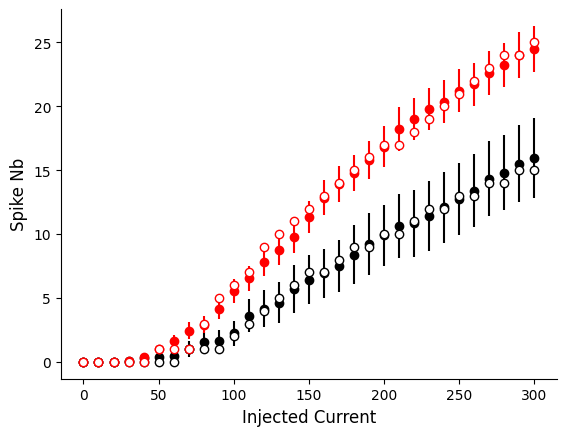

Female


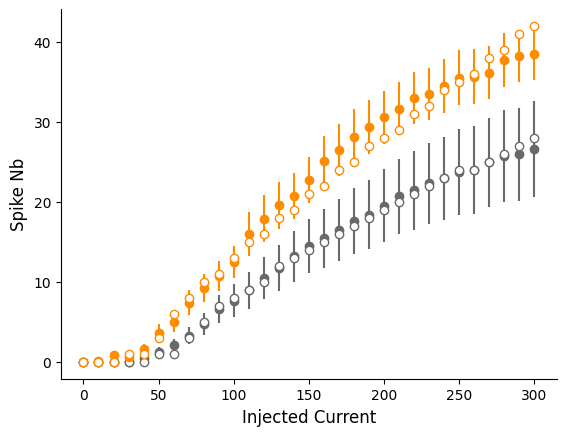

In [4]:
#This cells create the IO curves figures

df_exp_IO_curves=pd.read_excel('Exp_IO_curves.xlsx')

for animal_sex in ['Male','Female']:
    for condition in ['SHAM','IONL']:

        animal_condition=condition+'_'+animal_sex


        list_Iinj=[]
        for i in range(31):
            list_Iinj.append(i*10)

        
        iocurve_exp=df_exp_IO_curves['Mean_'+ animal_condition]
        sem_exp=df_exp_IO_curves['Sem_'+ animal_condition]
        iocurve_model=df_model_IO_curves[animal_condition]
        sem_model=[]
        for _ in range(len(list_Iinj)):
            sem_model.append(0)

        if animal_condition=='SHAM_Male':
            color='k'
        elif animal_condition=='IONL_Male':
            color='r'
        elif animal_condition=='SHAM_Female':
            color='dimgrey'
        elif animal_condition=='IONL_Female':
            color='darkorange'

        plt.errorbar(list_Iinj,iocurve_exp,yerr=sem_exp,fmt='o',color=color)
        plt.errorbar(list_Iinj,iocurve_model,yerr=sem_model,fmt='o',mfc='w',mec=color)
        
        plt.xlabel('Injected Current',fontsize=12)
        plt.ylabel('Spike Nb',fontsize=12)
    print(animal_sex)
    plt.savefig('IOcurve_'+animal_sex+'.svg')
    plt.show()
